# Morphological operations

In [1]:
import numpy as np
from skimage import data, filters, draw
import matplotlib.pyplot as plt

from skimage.morphology import disk

In [2]:
plt.rcParams['text.color'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['font.size'] = 18

We will create a structural element (SE) and a simple object "L", on which we will gradually create morphological operations.

/var/folders/mt/zbsgqls91d5c1dt725ckq4lc0000gn/T/ipykernel_93353/792663757.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  I = np.zeros((16,16),dtype=np.bool)


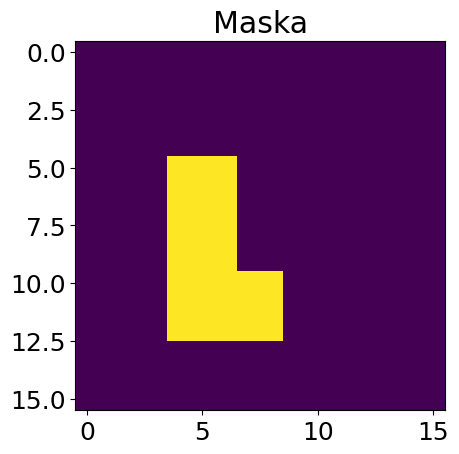

In [3]:
I = np.zeros((16,16),dtype=np.bool)
rr, cc = draw.rectangle((5, 4), extent=(5, 3), shape=I.shape)
I[rr, cc] = True
rr, cc = draw.rectangle((10, 4), extent=(3, 5), shape=I.shape)
I[rr, cc] = True
backup = I
plt.imshow(I)
plt.title("Maska");

In [4]:
I.shape

(16, 16)

In [5]:
SE = np.array([[1, 0],[1, 0],[1, 1]])
SE

array([[1, 0],
       [1, 0],
       [1, 1]])

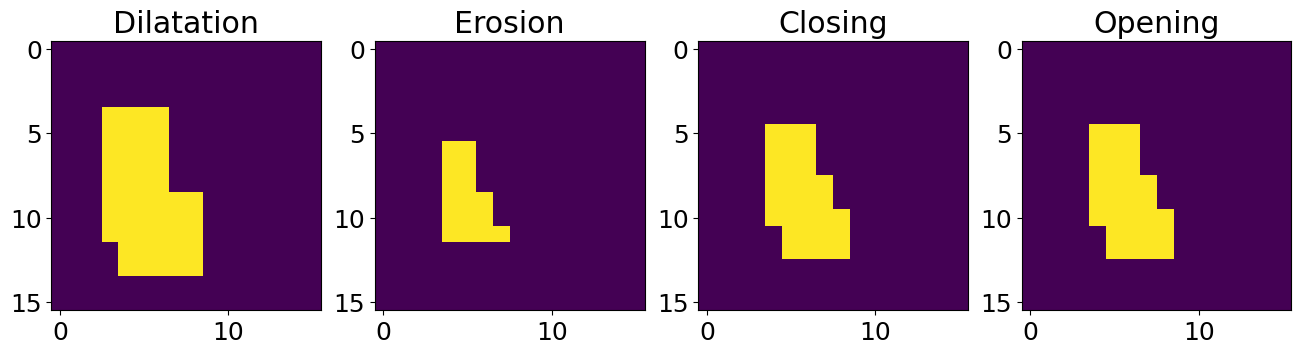

In [16]:
from skimage import morphology
#selem = morphology.selem.rectangle(3,2)

dilated_I = morphology.dilation(backup,SE)
eroded_I = morphology.erosion(backup,SE)
closed_I = morphology.closing(backup,SE)
open_I = morphology.opening(backup,SE)

plt.figure(figsize=(16,10))
plt.subplot(141)
plt.imshow(dilated_I)
plt.title("Dilatation");
plt.subplot(142)
plt.imshow(eroded_I)
plt.title("Erosion");
plt.subplot(143)
plt.imshow(closed_I)
plt.title("Closing");
plt.subplot(144)
plt.imshow(open_I)
plt.title("Opening");

## Real world problem

Text(0.5, 1.0, 'Otsu thresh binary mask based on blue channel')

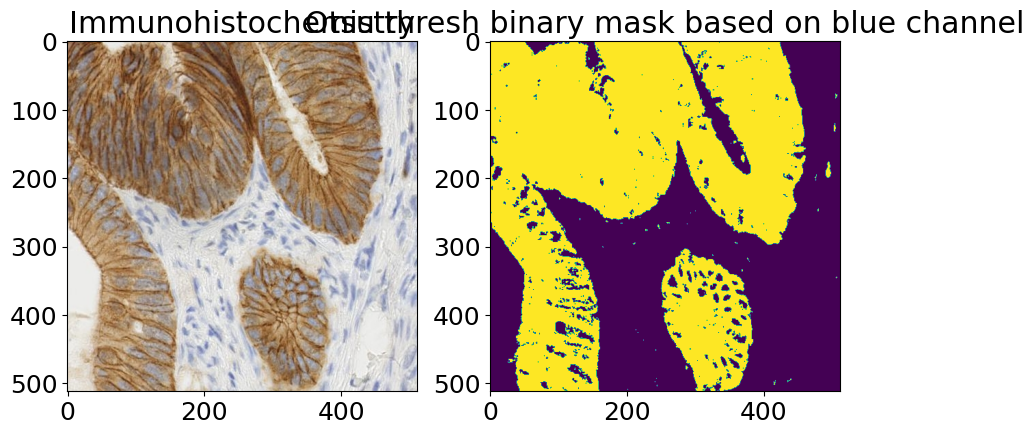

In [17]:
I3 =data.immunohistochemistry()

plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(I3)
plt.title('Immunohistochemistry')
plt.subplot(222)
B = I3[:,:,2]

out  = filters.threshold_otsu(B)

mask = B<out
plt.imshow(mask)
plt.title('Otsu thresh binary mask based on blue channel')

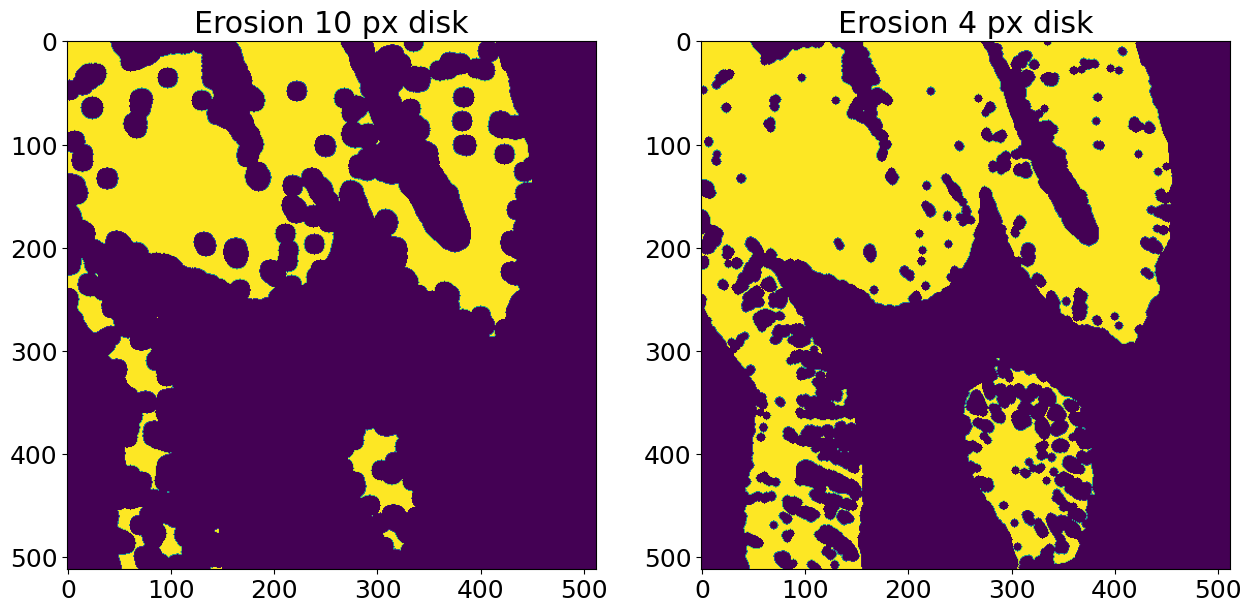

In [18]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title('Erosion 10 px disk')
plt.imshow(morphology.erosion(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Erosion 4 px disk')
plt.imshow(morphology.erosion(mask,morphology.disk(4)));

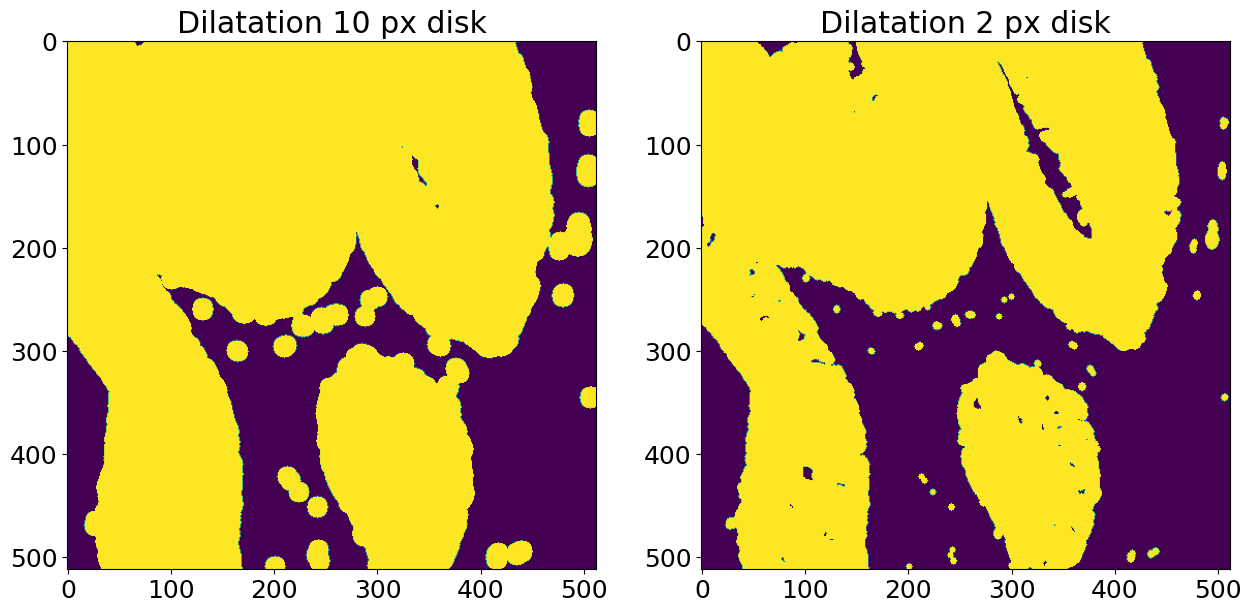

In [19]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title('Dilatation 10 px disk')
plt.imshow(morphology.dilation(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Dilatation 2 px disk')
plt.imshow(morphology.dilation(mask,morphology.disk(3)));

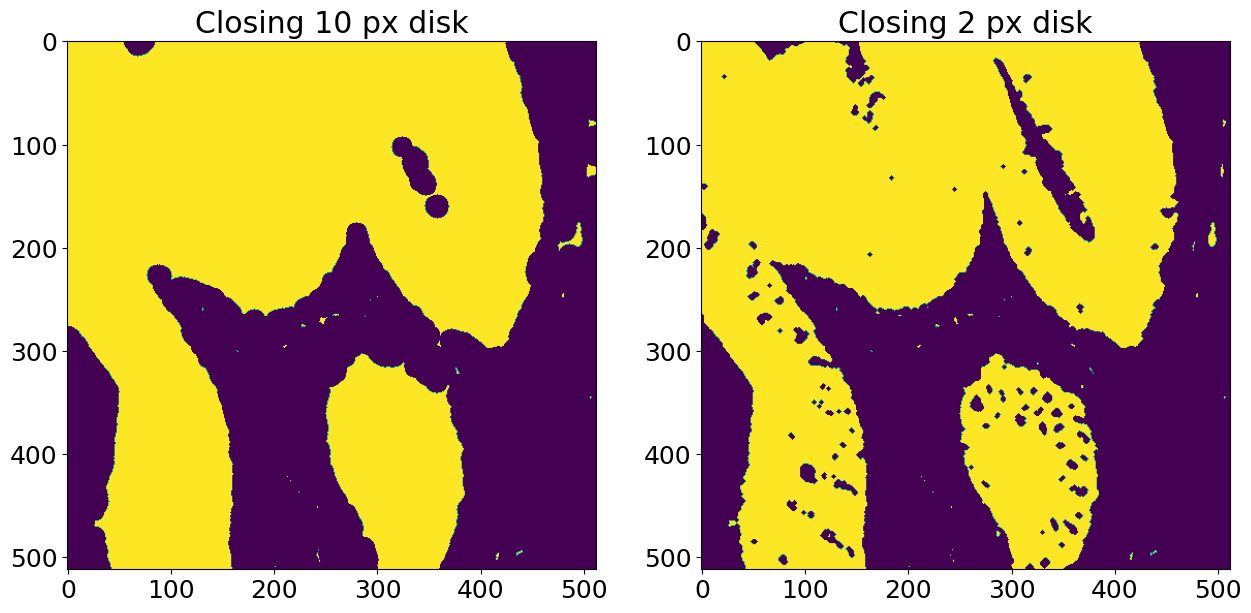

In [20]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.title('Closing 10 px disk')
plt.imshow(morphology.closing(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Closing 2 px disk')
plt.imshow(morphology.closing(mask,morphology.disk(2)));


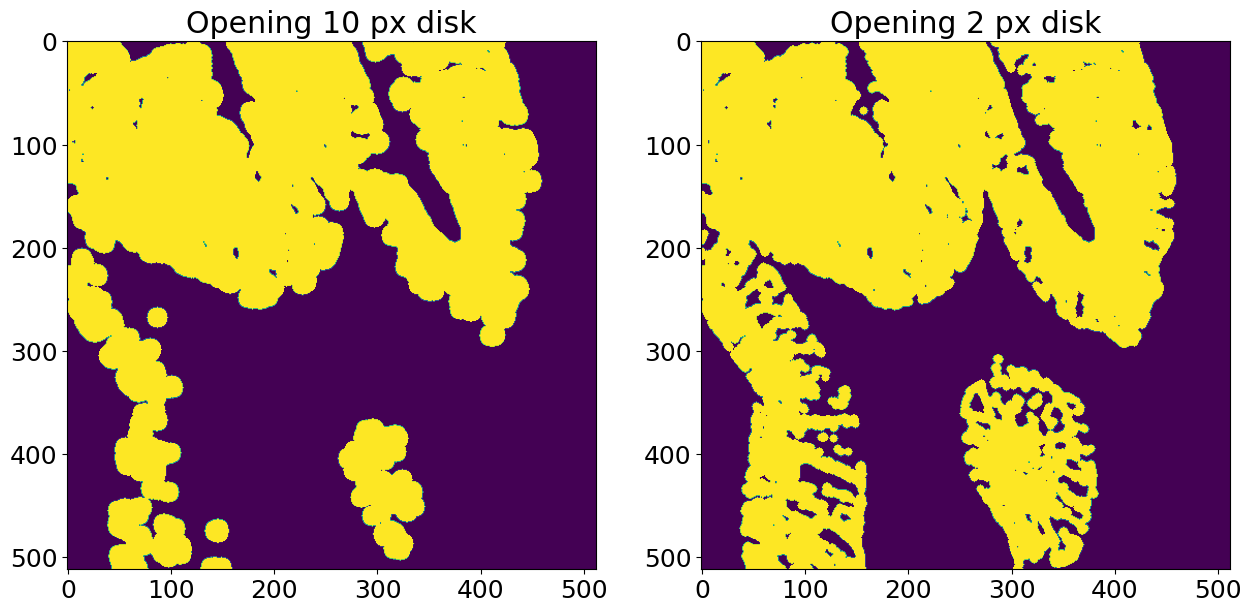

In [21]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title('Opening 10 px disk')
plt.imshow(morphology.opening(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Opening 2 px disk')
plt.imshow(morphology.opening(mask,morphology.disk(4)));

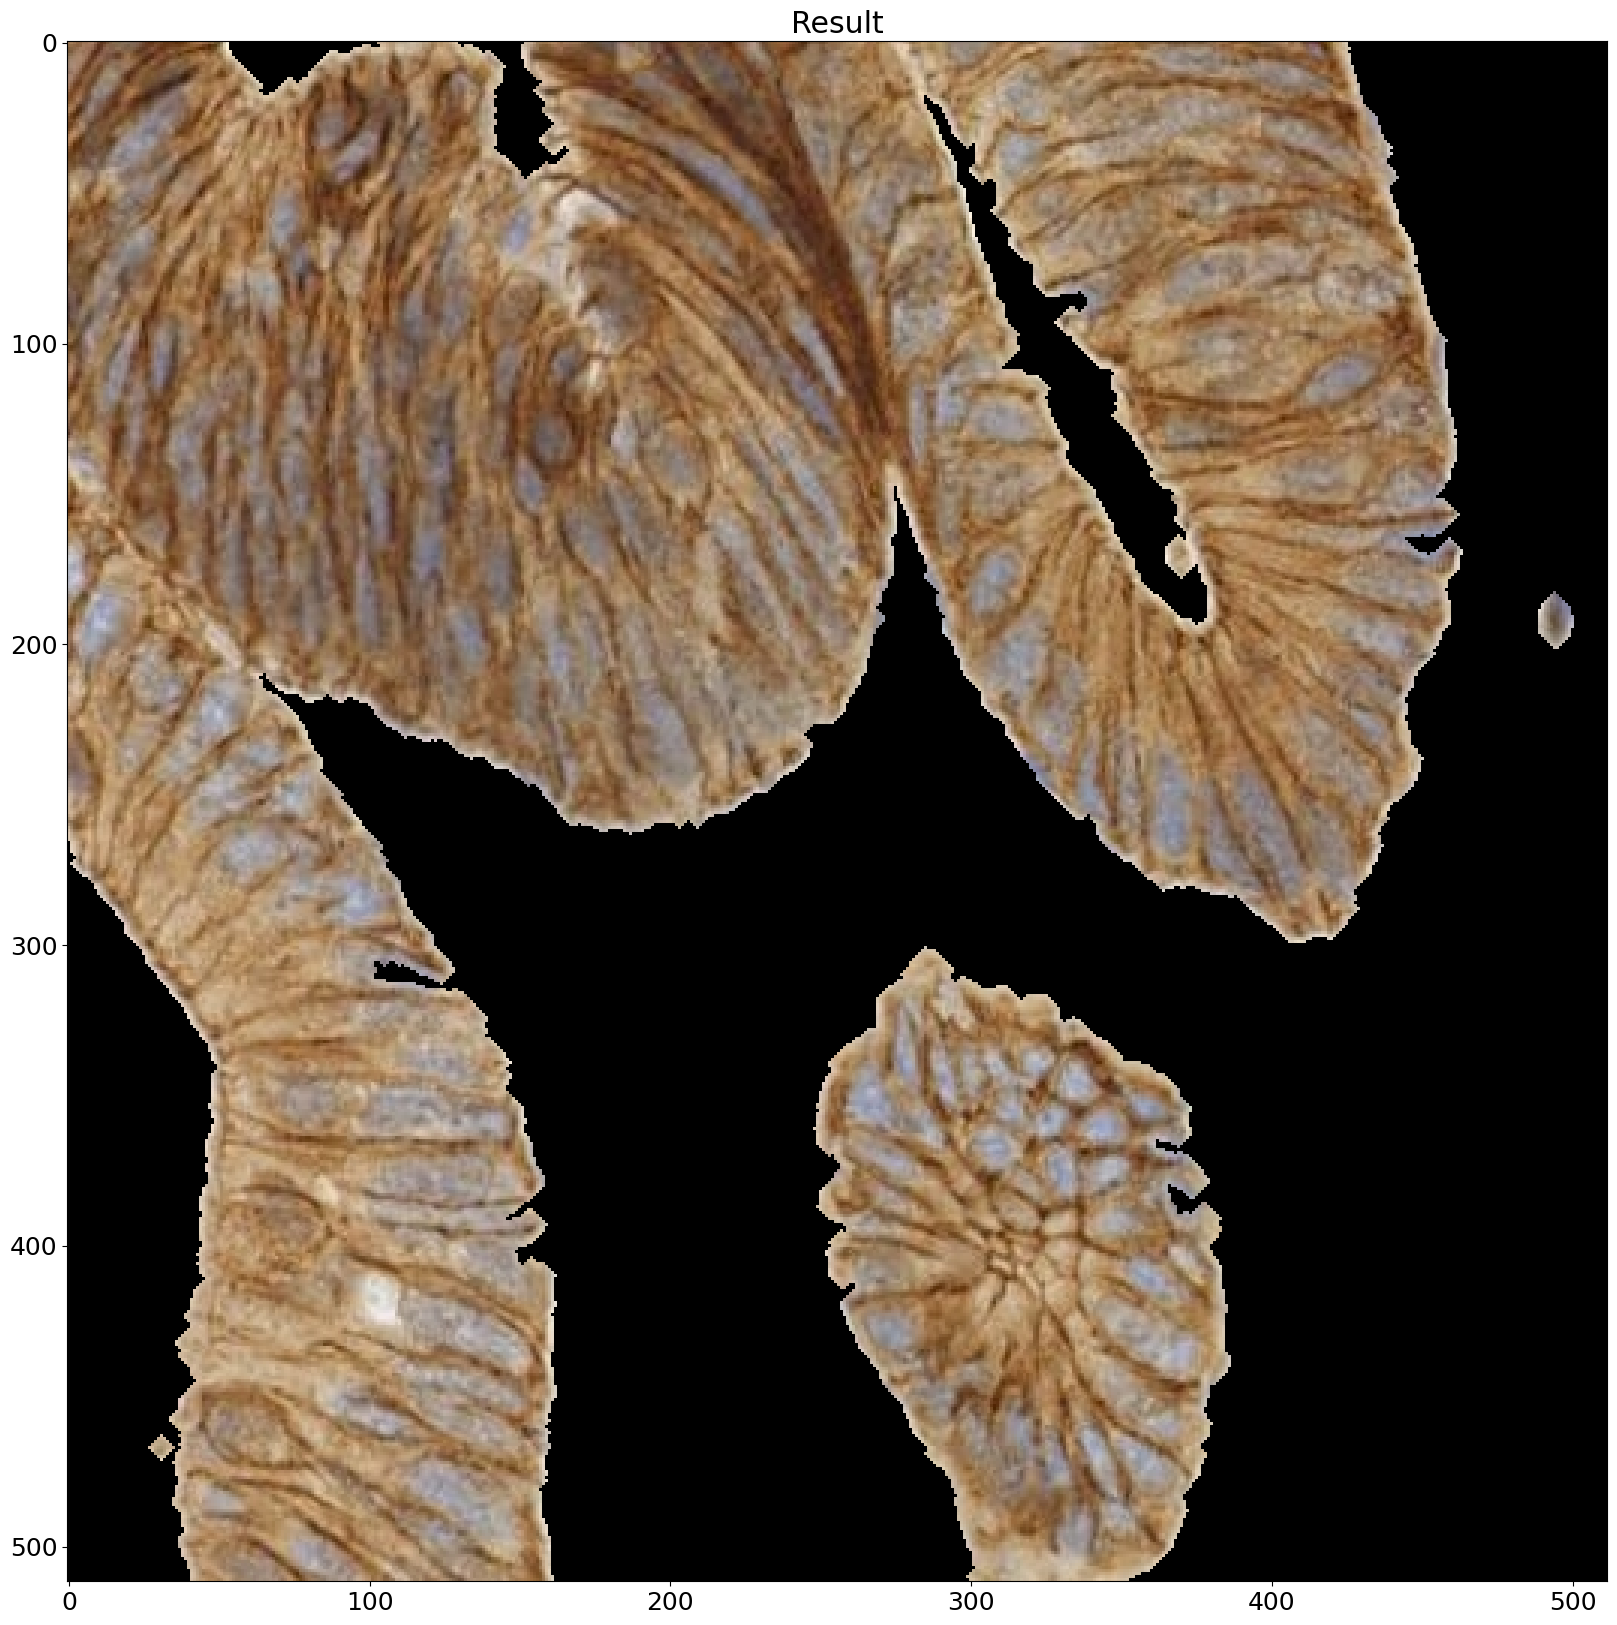

In [22]:
plt.figure(figsize=(20, 20))
mask_final = morphology.remove_small_holes(morphology.dilation(morphology.opening(mask,morphology.disk(2)),morphology.disk(2)),256)
plt.imshow(I3 * np.dstack((mask_final,mask_final,mask_final)),cmap='gray')
# plt.imshow(mask_final)
plt.title('Result');